## ESA CCI Toolbox Vector Data Access

The ESA CCI Toolbox also provides access to data that is not provided on a structured grid. This data is provided in the form of geopandas geodataframes rather than xarray datasets.

To run this Notebook, make sure the ESA CCI Toolbox is setup correctly.

For this notebook, we start as before, by opening the standard `esa-cci` data store.

In [1]:
from xcube.core.store import new_data_store

cci_store = new_data_store('esa-cci')

The data in question are AEROSOL, GHG, ICESHEETS, RIVER DISCHARGE (RD), SEAICE, and SEALEVEL datasets in `satellite-orbit-frequency`. Let's search for ICESHEETS datasets.

In [2]:
descriptors = cci_store.search_data(
    data_type="geodataframe",
    cci_attrs=dict(
        ecv="ICESHEETS"
    )
)
[descriptor.data_id for descriptor in descriptors]

['esacci.ICESHEETS.unspecified.Unspecified.CFL.multi-sensor.multi-platform.UNSPECIFIED.v3-0.greenland',
 'esacci.ICESHEETS.unspecified.Unspecified.GLL.multi-sensor.multi-platform.UNSPECIFIED.v1-3.greenland']

We have a closer look at the first one.

In [3]:
descriptors[0]

We can now open the dataframe, just like we would open any other dataset. For dataframes, all data is read in immediately when displaying frame. As we want to avoid long waiting times, we ask for a temporal subset by applying a time range.

In [4]:
icesheets_df = cci_store.open_data(
    "esacci.ICESHEETS.unspecified.Unspecified.CFL.multi-sensor.multi-platform.UNSPECIFIED.v3-0.greenland",
    time_range=("2014-10-01", "2014-10-15")
)

Now we may view the actual frame.

In [5]:
icesheets_df

,geometry,RC_ID,analy_time,data_src,proc_desc,3d_desc,inst_name,orig_id,acq_time,imgctrlon,...,ID,type,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,label,orthocorre,pro_mat,time
0,"LINESTRING (-52.60689 72.05466, -52.6051 72.05...",514,2016-11-07,LANDSAT,manual delineation - assembling to shapefiles,Level 1 T - Standard Terrain Correction,OLI,LC80130092014276LGN00,2014-10-03 15:24:43,-52.371771,...,G307495E72082N,m,60.0,60.0,12.0,12.0,trm,y,OW,2014-10-03T00:00:00
1,"LINESTRING (-49.7893 69.22284, -49.78914 69.22...",514,2016-11-07,LANDSAT,manual delineation - assembling to shapefiles,Level 1 T - Standard Terrain Correction,OLI,LC80090112014280LGN00,2014-10-07 15:00:48,-49.456945,...,G310846E69083N,m,60.0,60.0,12.0,12.0,trm,y,IM,2014-10-07T00:00:00
2,"LINESTRING (-49.7893 69.22284, -49.78914 69.22...",514,2016-11-07,LANDSAT,manual delineation - assembling to shapefiles,Level 1 T - Standard Terrain Correction,OLI,LC80090112014280LGN00,2014-10-07 15:00:48,-49.456945,...,G310846E69083N,m,60.0,60.0,12.0,12.0,trm,y,IM,2014-10-07T00:00:00
3,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00
4,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00
5,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00
6,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00
7,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00
8,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00
9,"LINESTRING (-52.61219 72.054, -52.61169 72.054...",514,2016-05-04,SENTINEL-1A IW SLC,SLC - geocoding - manual delineation - assembl...,"DEM: GEOID96, Software: ESP 2.1",SAR-C,s1a-iw2-slc-hh-20141011t204736-20141011t204801...,2014-10-11 20:47:47,-52.371800,...,G307495E72082N,m,120.0,120.0,60.0,60.0,trm,y,OW,2014-10-11T00:00:00


If you now plot the dataframe, you will see that all loaded entries are included.

<Axes: >

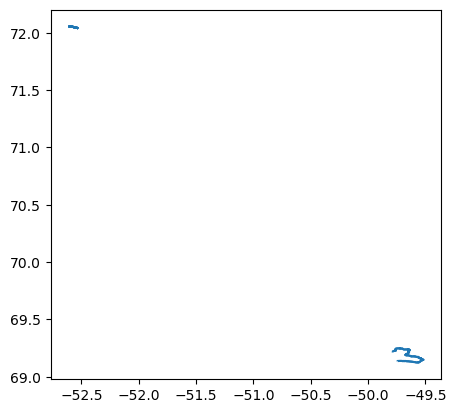

In [6]:
icesheets_df.plot()

### Reading River Discharge Data

With River Discharge Data, there is a particularity, as it supports requesting by placenames. We can see this from the dataset's descriptor.

In [7]:
descriptors = cci_store.search_data(
    data_type="geodataframe",
    cci_attrs=dict(
        ecv="RD"
    )
)
[descriptor.data_id for descriptor in descriptors]

['esacci.RD.satellite-orbit-frequency.L3S.WL.multi-sensor.multi-platform.MERGED.v1-1.r1']

In [8]:
descriptors[0]

Under ''open_params_schema/properties/place_names' you can find a list of place names that you can ask for when opening the dataset. You can also omit the parameter if you wish to get the data for all rivers (this would take some time to load).

In [9]:
ghg_df = cci_store.open_data(
    "esacci.RD.satellite-orbit-frequency.L3S.WL.multi-sensor.multi-platform.MERGED.v1-1.r1",
    place_names=["GARONNE_GARONNE_LAMAGISTERE", "PO_PO_PIACENZA"]
)
ghg_df

,geometry,time,water_surface_height_above_reference_datum,water_surface_height_uncertainty,platform,orbit_track_number,mission_cycle_number
0,POINT (0.8224 44.1233),2002-07-10 10:30:24,75.040001,0.00,Envisat,646,7
1,POINT (0.8186 44.1231),2002-08-14 10:30:24,75.430000,0.00,Envisat,646,8
2,POINT (0.8265 44.1215),2002-09-18 10:30:24,74.669998,0.00,Envisat,646,9
3,POINT (0.8115 44.1233),2003-04-16 10:30:24,74.879997,0.12,Envisat,646,15
4,POINT (0.8242 44.122),2003-06-25 10:30:24,75.019997,0.54,Envisat,646,17
...,...,...,...,...,...,...,...
883,POINT (9.729 45.0658),2023-03-23 09:55:12,80.739998,0.11,Sentinel-3A,44,97
884,POINT (9.7585 45.1022),2023-04-11 20:45:52,80.959999,0.00,Sentinel-3B,313,78
885,POINT (9.729 45.0658),2023-04-19 09:55:12,80.680000,0.13,Sentinel-3A,44,98
886,POINT (9.7585 45.1022),2023-05-08 20:45:52,81.019997,0.05,Sentinel-3B,313,79


We may now plot the data.

<Axes: >

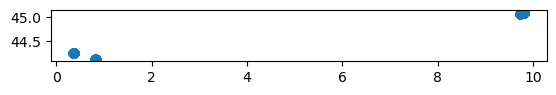

In [10]:
ghg_df.plot()